## Water Quality Analysis

#### <u> Drinking water potability </u>



#### <u> Context </u>

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


#### <u> Content </u>

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

<b> 1. pH value: </b> 
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

<b> 2. Hardness: </b> 
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

<b> 3. Solids (Total dissolved solids - TDS): </b> 
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

<b> 4. Chloramines: </b> 
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

<b> 5. Sulfate: </b> 
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

<b> 6. Conductivity: </b> 
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

<b> 7. Organic_carbon: </b> 
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

<b> 8. Trihalomethanes: </b> 
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

<b> 9. Turbidity: </b> 
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

<b> 10. Potability: </b> 
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.




##### STEPS COVERED :
##### <u> FEATURE ENGINEERING - Treating the Missing Values </u><br>
1)Random Sample Imputation<br>
2)For Handling Categorical missing values like Cabin<br>

3)Frequent Category Imputation<br>
4)Label Encoding<br>

##### <u>Normalization And Standardisation</u><br>

Robust Scaler<br>

##### <u> DISTRIBUTION OF THE COLUMNS </u> <br>

Guassian Transformation<br>
boxcox transformation - For coverting Skewed Cloumns to Normal Distribution<br>

##### <u> FEATURE SELECTION  Univariate Selection</u> <br>
ExtraTreesClassifier/Kbest Selector<br>

##### <u> Importance Of The Features Wrt, Label/Target Variable</u> <br>

Correlation - To Check Multicollinearity
##### <u>  Treating the multicollinearity with Threshold values</u>  <br>

##### Information Gain<br>
##### Checking for Outliers<br>
##### PIPELINE CREATION<br>

##### Hyper Parameter Tuning For Logistic Regression<br>
Randomized Search Cross Validation<br>
GridSearch CV<br>
=============================================<br>
##### Automated Hyperparameter Tuning<br>
=============================================<br>
Bayesian Optimization<br>
Genetic Algorithms - TPOT Classifier<br>
=============================================<br>

##### Optimize hyperparameters of the model using Optuna<br>


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
# Importing all datasets
water_portability = pd.read_csv("C:/Users/HP/Desktop/Upgrad Case Study/Water Quality/water_potability.csv")
water_portability.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0


In [5]:
water_portability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
water_portability.shape

(3276, 10)

# <u> FEATURE ENGINEERING </u>

### Treating the `Missing` Values

Data That can be missing can be of two types : <br>
    1) Continuous Data <br>
    2) Discreate Or Categorical Data <br>
    
The Types of `missing` can be of mentioned types : <br>
1) <b>MCAR</b> - Missing Completely At Random <br>
If the probability of being `missing` is same for all the observations.<br>
2) <b>MNAR</b> - Missing Not At Random <br>
There is some relationship between the missing data <br>
3) <b>MAR</b> - Missing At Random <br>


#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at `random(MCAR)`

In [7]:
water_portability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [9]:
median=water_portability.ph.median()

In [10]:
median

7.036752103833548

In [11]:
impute_nan(water_portability,"ph",median)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

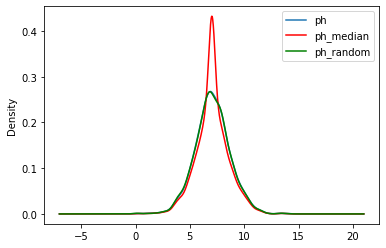

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

water_portability.ph.plot(kind='kde', ax=ax)
water_portability.ph_median.plot(kind='kde', ax=ax, color='red')
water_portability.ph_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From the Above `Observation`,

In [14]:
water_portability = water_portability.drop(columns=["ph","ph_median"])

In [15]:
water_portability = water_portability.rename(columns={"ph_random": "ph"})

In [16]:
median=water_portability.Sulfate.median()

In [17]:
median

333.073545745888

In [18]:
impute_nan(water_portability,"Sulfate",median)

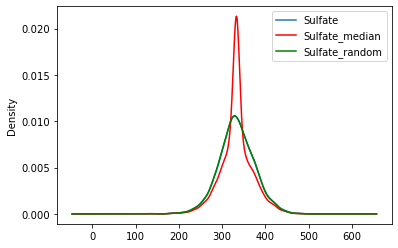

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

water_portability.Sulfate.plot(kind='kde', ax=ax)
water_portability.Sulfate_median.plot(kind='kde', ax=ax, color='red')
water_portability.Sulfate_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From the Above `Observation`, for "Sulfate"

In [20]:
water_portability = water_portability.drop(columns=["Sulfate","Sulfate_median"])

In [21]:
water_portability = water_portability.rename(columns={"Sulfate_random": "Sulfate"})

In [22]:
median=water_portability.Trihalomethanes.median()

In [23]:
median

66.62248509808484

In [24]:
impute_nan(water_portability,"Trihalomethanes",median)

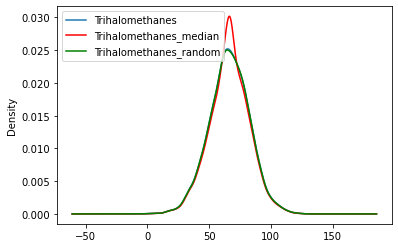

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

water_portability.Trihalomethanes.plot(kind='kde', ax=ax)
water_portability.Trihalomethanes_median.plot(kind='kde', ax=ax, color='red')
water_portability.Trihalomethanes_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From the Above `Observation`, for "Trihalomethanes":

In [26]:
water_portability = water_portability.drop(columns=["Trihalomethanes","Trihalomethanes_median"])

In [27]:
water_portability = water_portability.rename(columns={"Trihalomethanes_random": "Trihalomethanes"})

In [28]:
water_portability.isnull().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Turbidity          0
Potability         0
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

In [29]:
water_portability.head(3)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,ph,Sulfate,Trihalomethanes
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,9.074923,368.516441,86.990970
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,3.716080,298.082462,56.329076
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,8.099124,367.224297,66.420093


In [30]:
water_portability.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

### Label Encoding

 - Since, All the values are `numerical` in nature, So actually `No Label Encoding` is Required.

## Normalization And Standardisation

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10 <br>

<b>9-90 percentile </b>---90% of all values in this group is less than 9 <br>
<b>1-10 precentile </b>---10% of all values in this group is less than 1 <br>
4-40% <br>

In [31]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
water_portability_robust_scaler=pd.DataFrame(scaler.fit_transform(water_portability),columns=water_portability.columns)
water_portability_robust_scaler.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,ph,Sulfate,Trihalomethanes
0,0.198981,-0.011702,0.085492,1.227178,-0.854560,-0.935210,0.0,1.032167,0.682864,0.945611
1,-1.696382,-0.196962,-0.249088,1.473406,0.214093,0.514449,0.0,-1.672015,-0.666773,-0.479033
2,0.684850,-0.087287,1.079558,-0.028251,0.590024,-0.847715,0.0,0.539759,0.658104,-0.010174
3,0.437145,0.093483,0.467446,-0.505079,0.939076,0.635242,0.0,0.649586,0.460007,1.565925
4,-0.398477,-0.252771,-0.293690,-0.202262,-0.592197,0.113188,0.0,1.040897,-0.435811,-1.609529


### DISTRIBUTION OF THE `COLUMNS` 

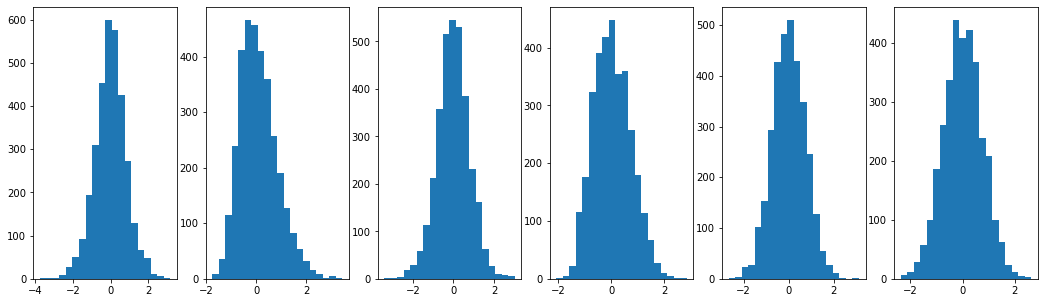

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(1,6,1)
plt.hist(water_portability_robust_scaler['Hardness'],bins=20)
plt.subplot(1,6,2)
plt.hist(water_portability_robust_scaler['Solids'],bins=20)
plt.subplot(1,6,3)
plt.hist(water_portability_robust_scaler['Chloramines'],bins=20)
plt.subplot(1,6,4)
plt.hist(water_portability_robust_scaler['Conductivity'],bins=20)
plt.subplot(1,6,5)
plt.hist(water_portability_robust_scaler['Organic_carbon'],bins=20)
plt.subplot(1,6,6)
plt.hist(water_portability_robust_scaler['Turbidity'],bins=20)
plt.show()

(array([  1.,   2.,  10.,  13.,  29.,  80., 142., 225., 338., 444., 507.,
        490., 405., 288., 163.,  70.,  40.,  18.,   7.,   4.]),
 array([-3.06196299, -2.77560672, -2.48925045, -2.20289418, -1.91653791,
        -1.63018164, -1.34382537, -1.0574691 , -0.77111283, -0.48475656,
        -0.19840029,  0.08795598,  0.37431225,  0.66066852,  0.94702479,
         1.23338106,  1.51973733,  1.8060936 ,  2.09244987,  2.37880614,
         2.66516241]),
 <BarContainer object of 20 artists>)

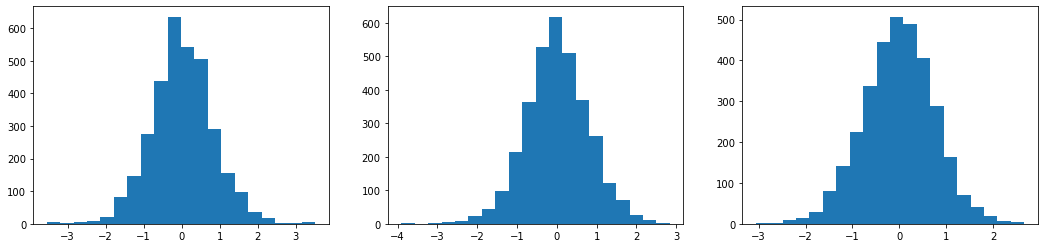

In [33]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.hist(water_portability_robust_scaler['ph'],bins=20)
plt.subplot(1,3,2)
plt.hist(water_portability_robust_scaler['Sulfate'],bins=20)
plt.subplot(1,3,3)
plt.hist(water_portability_robust_scaler['Trihalomethanes'],bins=20)

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


- Since , The Data are `Normally Distributed` , thus , Guassian Transformation is actually Not Required.

In [34]:
# choosing all the numerical variables as independent variables (classifier can only take numerical input)
# dropping two variable funded_amnt as we have created new variable transformation based on it 
X = water_portability_robust_scaler.drop(columns = "Potability")
Y = water_portability_robust_scaler["Potability"]

#splitting the dataset in train and test datasets using a split ratio of 70:30

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [35]:
X_train.shape

(2293, 9)

In [36]:
X_test.shape

(983, 9)

In [37]:
y_train.shape

(2293,)

In [38]:
y_test.shape

(983,)

### Data Analysis - Univariate And Bivariate Analysis

### <u> <b> Univariate Analysis </b> </u>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")

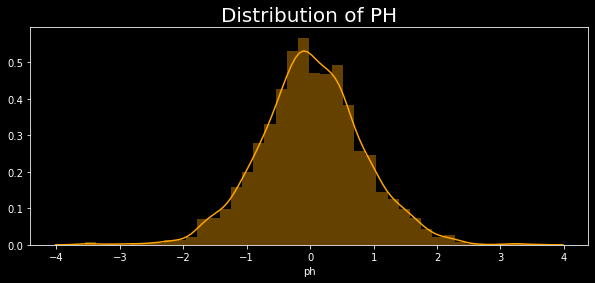

In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
plt.figure(figsize = [10,4])
sns.distplot(water_portability_robust_scaler.ph,  bins = 40, color = "orange")
plt.title("Distribution of PH", fontsize = 20, fontweight = 10, verticalalignment = 'baseline')

plt.show()

<AxesSubplot:xlabel='ph', ylabel='Chloramines'>

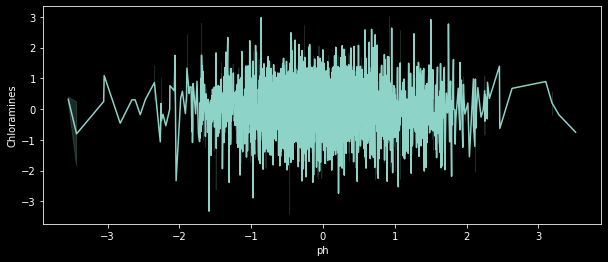

In [41]:
plt.figure(figsize = [10,4])
sns.lineplot(water_portability_robust_scaler.ph,water_portability_robust_scaler.Chloramines)

# FEATURE SELECTION 

#### Univariate Selection

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [44]:
print(model.feature_importances_)


[0.11594886 0.10988133 0.11373841 0.10543524 0.10578978 0.1009698
 0.12165579 0.12351395 0.10306684]


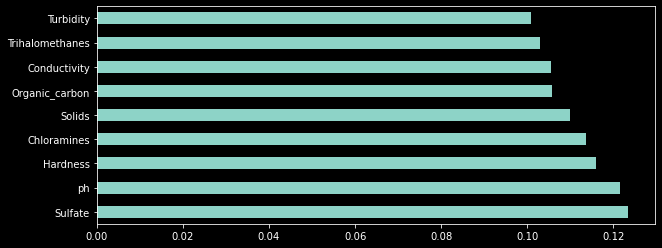

In [45]:
plt.figure(figsize = [10,4])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Importance Of The Features Wrt, `Label/Target Variable`

In [46]:
ranked_features.nlargest(10, keep='all')

Sulfate            0.123514
ph                 0.121656
Hardness           0.115949
Chloramines        0.113738
Solids             0.109881
Organic_carbon     0.105790
Conductivity       0.105435
Trihalomethanes    0.103067
Turbidity          0.100970
dtype: float64

 - Here , From the above observation , all the features are important wrt, the `target` , So we can not drop `any`

### Correlation - To Check `Multicollinearity`

In [47]:
X_train.corr()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,ph,Sulfate,Trihalomethanes
Hardness,1.000000,-0.034806,-0.025428,-0.046913,0.019890,-0.007436,0.089940,-0.106678,0.000758
Solids,-0.034806,1.000000,-0.075316,0.016267,0.032627,0.013813,-0.055973,-0.160251,-0.006719
Chloramines,-0.025428,-0.075316,1.000000,-0.024329,-0.016638,-0.008555,-0.029079,0.003724,0.017276
Conductivity,-0.046913,0.016267,-0.024329,1.000000,0.016295,0.020973,0.010788,-0.021495,0.018741
Organic_carbon,0.019890,0.032627,-0.016638,0.016295,1.000000,-0.024333,0.049783,0.041937,0.013133
Turbidity,-0.007436,0.013813,-0.008555,0.020973,-0.024333,1.000000,-0.038699,-0.000653,-0.014935
ph,0.089940,-0.055973,-0.029079,0.010788,0.049783,-0.038699,1.000000,0.017882,0.018010
Sulfate,-0.106678,-0.160251,0.003724,-0.021495,0.041937,-0.000653,0.017882,1.000000,-0.033332
Trihalomethanes,0.000758,-0.006719,0.017276,0.018741,0.013133,-0.014935,0.018010,-0.033332,1.000000


<AxesSubplot:>

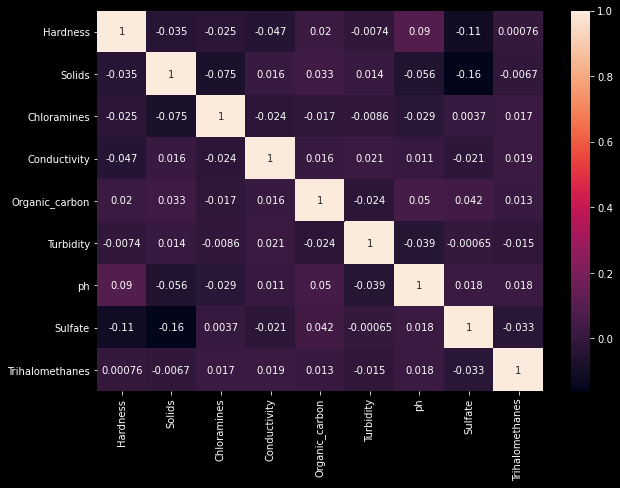

In [48]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(10,7))
sns.heatmap(X_train[top_features].corr(),annot=True)


### Reduction Of `Multi Collinearity`

In [49]:
threshold=0.6

In [50]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
correlation(X_train,threshold)

set()

#### Information Gain

In [52]:
from sklearn.feature_selection import mutual_info_classif

In [53]:
mutual_info=mutual_info_classif(X_train,y_train)

In [54]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

Turbidity          0.019079
Sulfate            0.013652
ph                 0.011731
Hardness           0.006109
Conductivity       0.000936
Organic_carbon     0.000755
Solids             0.000000
Chloramines        0.000000
Trihalomethanes    0.000000
dtype: float64

From the above Information, <br>
let us take the mentioned below Feature wrt, target variable <br>

- Solids         <br>
- Chloramines          <br>
- Trihalomethanes        <br>


In [55]:
X_train = X_train.drop(columns = ['Solids', 'Chloramines', 'Trihalomethanes'])

In [56]:
X_test = X_test.drop(columns = ['Solids', 'Chloramines', 'Trihalomethanes'])

#### Final Dimensions - After All `Features Engineering` and `Selection Is completed`

In [57]:
X_test.shape

(983, 6)

In [58]:
X_train.shape

(2293, 6)

### Checking for `Outliers`

##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

In [59]:
X_train.columns

Index(['Hardness', 'Conductivity', 'Organic_carbon', 'Turbidity', 'ph',
       'Sulfate'],
      dtype='object')

In [60]:
# Checking for outliers in the continuous variables
num_X_train = X_train[['Hardness', 'Conductivity', 'Organic_carbon', 'Turbidity', 'ph','Sulfate']]

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_X_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Hardness,Conductivity,Organic_carbon,Turbidity,ph,Sulfate
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,-0.002888,0.035332,0.015238,-0.000296,0.033365,0.004578
std,0.831040,0.689261,0.734216,0.730168,0.813348,0.790693
min,-2.583734,-2.071391,-2.675587,-2.361877,-3.547225,-3.906685
25%,-0.507013,-0.478332,-0.475566,-0.490746,-0.468916,-0.488943
50%,0.008026,0.001331,-0.007636,-0.015101,0.012503,-0.017732
75%,0.508631,0.516009,0.519653,0.500800,0.548452,0.518344
90%,1.004722,0.949998,0.944848,0.942614,1.058468,0.981380
95%,1.348951,1.211064,1.196574,1.180106,1.402574,1.319435
99%,2.037302,1.639084,1.719739,1.648406,1.970427,1.927068


In [ ]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

## Outlier Treatment

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

## Isolation Forest

`Isolation Forest`, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

for reference,
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/


In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

In [ ]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1

In [ ]:
X_train = X_train[mask]

In [ ]:
y_train = y_train[mask]

In [ ]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

## PIPELINE CREATION

In [ ]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
pipeline_lr=Pipeline([('scalar1',RobustScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipeline_dt=Pipeline([('scalar2',RobustScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_randomforest=Pipeline([('scalar3',RobustScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipeline_gradient_boost=Pipeline([('scalar4',RobustScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('gb_classifier',GradientBoostingClassifier())])

In [ ]:
pipeline_XGboost=Pipeline([('scalar5',RobustScaler()),
                          ('pca5',PCA(n_components=2)),
                          ('xgb_classifier',XGBClassifier())])

In [ ]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_gradient_boost,pipeline_XGboost]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'Gradient Boost', 4: 'Extreme Gradient Boost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

In [ ]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

In [ ]:
y_test.value_counts()

### Let's Use XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
y_pred[0:20]

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1,n_jobs=4, cv=5)

In [ ]:
gsearch1.fit(X_train,y_train)

In [ ]:
y_pred = gsearch1.predict(X_test)

In [ ]:
from sklearn import metrics

### Plotting the `Confusion Matrix`

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
#
# Print the confusion matrix using Matplotlib
#
plt.figure(figsize = [5,5])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test, y_pred))

### ROC CURVE

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, drop_intermediate = False )

In [ ]:
plt.figure(figsize= [8,8])
draw_roc(y_test, y_pred)

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
y_test_df = X_test

In [ ]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final = y_pred_final.rename(columns={0:"Water_Quality_Pred"})

In [ ]:
y_pred_final.head(4)

In [ ]:
y_pred_final.Water_Quality_Pred.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))

In [ ]:
model=pickle.load(open('model.pkl','rb'))

In [ ]:
model